In [1]:
#Import Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
import numpy as np

In [2]:
# Load the CSV file
df_new = pd.read_csv("API_Scraping_DATA.csv")

# Create a sub-dataframe with movies that have a Reddit Relevance Score of 5.0
df_final = df_new[df_new["Reddit Relevance Score"] == 5.0].copy()  # Explicitly create a copy

# Define the weights based on website visits (in millions)
weights = {
    "Rating TMDB": 15.8,
    "Rating Rotten": 83.2,
    "Rating Letterbox": 47.9
}

# Compute the weighted sum of ratings
df_final.loc[:, "Compound Score"] = (
    df_final["Rating TMDB"] * weights["Rating TMDB"] +
    df_final["Rating Rotten"] * weights["Rating Rotten"] +
    df_final["Rating Letterbox"] * weights["Rating Letterbox"]
) / sum(weights.values())

# Assign score categories using pd.cut
df_final.loc[:, "Score Category"] = pd.cut(
    df_final["Compound Score"],
    bins=[-float("inf"), 3, 4, float("inf")],
    labels=["Low", "Medium", "High"],
    right=False  # Ensures 4 is included in "High" and not in "Medium"
)

# Display the first few rows
df_final.head()


,Title,Release Date,Popularity,Genres,Revenue,Reddit Score,Reddit Comments,N Reddit Posts Week1-2,N Reddit Posts Week2-4,N Reddit Posts Week4+,Reddit Relevance Score,Rating Letterbox,Rating TMDB,Rating Rotten,Compound Score,Score Category
2,Fight Club,1999-10-15,122.573,['Drama'],100853753,505,311,50,0,0,5.0,4.3,4.2185,4.5,4.404509,High
3,Finding Nemo,2003-05-30,92.877,"['Animation', 'Family']",940335536,921,303,50,0,0,5.0,4.0,3.9085,3.8,3.876884,Medium
4,Forrest Gump,1994-06-23,97.189,"['Comedy', 'Drama', 'Romance']",677387716,1672,1178,50,0,0,5.0,4.1,4.2345,4.1,4.114466,High
6,Harry Potter and the Chamber of Secrets,2002-11-13,106.456,"['Adventure', 'Fantasy']",876688482,313,244,50,0,0,5.0,3.6,3.8560,4.0,3.854083,Medium
7,Harry Potter and the Goblet of Fire,2005-11-16,101.773,"['Adventure', 'Fantasy']",895921036,325,247,50,0,0,5.0,3.8,3.9025,3.4,3.584476,Medium


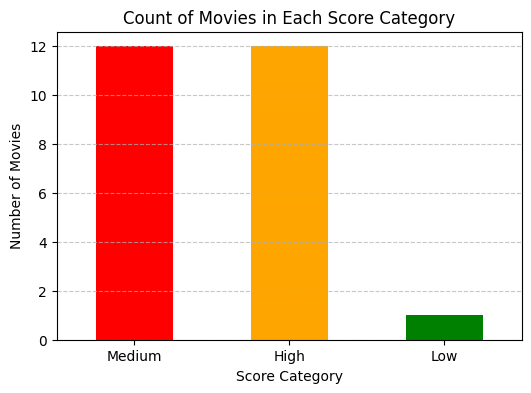

In [3]:
# Display the count of movies in each category
df_final["Score Category"].value_counts()

# Plot the count of movies in each score category
plt.figure(figsize=(6, 4))
df_final["Score Category"].value_counts().plot(kind="bar", color=["red", "orange", "green"])

# Add labels and title
plt.xlabel("Score Category")
plt.ylabel("Number of Movies")
plt.title("Count of Movies in Each Score Category")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


In [4]:
# Initialize the scaler with range (0,5)
scaler = MinMaxScaler(feature_range=(0, 5))

# Scale the revenue column (reshape required for scaler)
df_final["Scaled Revenue"] = scaler.fit_transform(df_final[["Revenue"]])

# Calculate the Final Score
df_final["Final Score"] = (df_final["Compound Score"] * 0.9)+ (df_final["Scaled Revenue"] * 0.1)

# Get the Top 12 Movies based on Final Score
tops = df_final.nlargest(12, "Final Score")[["Title", "Final Score", "Compound Score", "Revenue", "Scaled Revenue", "Genres", "Release Date"]]

# Display the top 12 ranked movies
tops


,Title,Final Score,Compound Score,Revenue,Scaled Revenue,Genres,Release Date
28,The Dark Knight,4.424514,4.417496,1004558444,4.487680,"['Drama', 'Action', 'Crime', 'Thriller']",2008-07-16
21,Schindler's List,4.222642,4.533351,321365567,1.426263,"['Drama', 'History', 'War']",1993-12-15
35,The Shawshank Redemption,4.178481,4.630178,28341469,0.113210,"['Drama', 'Crime']",1994-09-23
31,The Lord of the Rings: The Fellowship of the Ring,4.176804,4.208577,871368364,3.890849,"['Adventure', 'Fantasy', 'Action']",2001-12-18
18,Pulp Fiction,4.112031,4.463942,213928762,0.944834,"['Thriller', 'Crime']",1994-09-10
19,Raiders of the Lost Ark,4.082069,4.343022,389925971,1.733485,"['Adventure', 'Action']",1981-06-12
32,The Lord of the Rings: The Return of the King,4.067039,3.963376,1118888979,5.000000,"['Adventure', 'Fantasy', 'Action']",2003-12-17
11,Harry Potter and the Prisoner of Azkaban,4.033533,4.089997,789804554,3.525358,"['Adventure', 'Fantasy']",2004-05-31
10,Harry Potter and the Philosopher's Stone,4.023624,3.986045,976475550,4.361839,"['Adventure', 'Fantasy']",2001-11-16
29,The Green Mile,4.014215,4.318975,286801374,1.271380,"['Fantasy', 'Drama', 'Crime']",1999-12-10


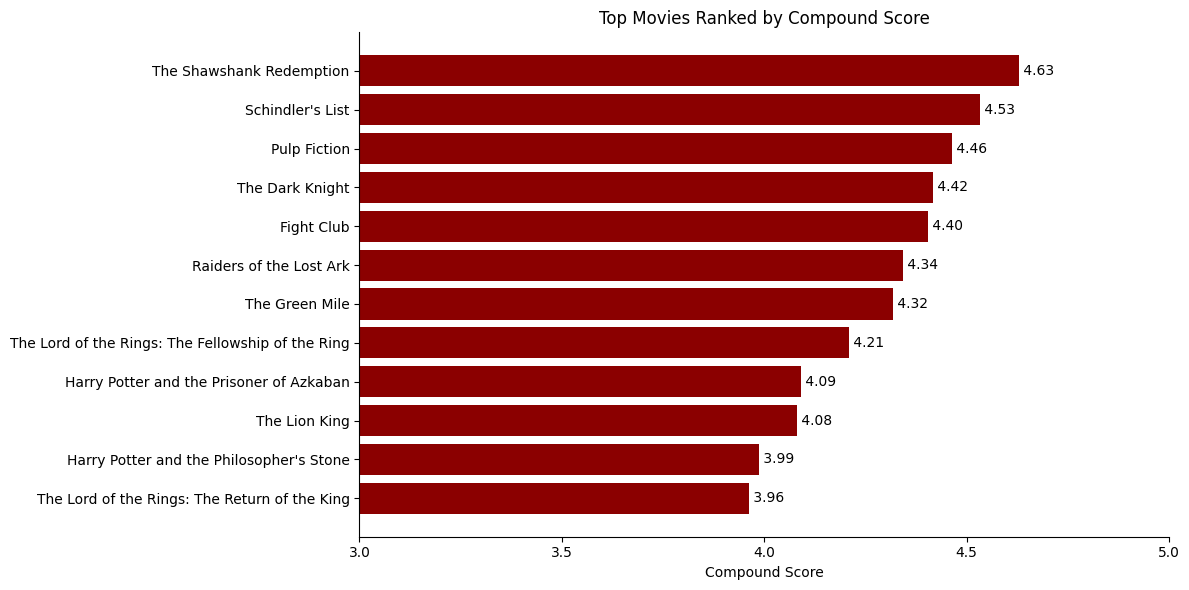

In [6]:
#COMPOUND SCORE RANKING

# Sort movies by Revenue in descending order
tops_sorted_compscore= tops.sort_values('Compound Score')

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Set figure background to be transparent
fig.patch.set_alpha(0.0)

# Make the axes background transparent
ax.set_facecolor('none')

# Create horizontal bar chart
ax.barh(range(len(tops_sorted_compscore)), tops_sorted_compscore['Compound Score'], color='darkred')

# Set the x-axis limits
ax.set_xlim(3, 5)

# Set the x-axis tick marks at 3.0, 3.5, 4.0, 4.5, 5.0
ax.set_xticks([3, 3.5, 4, 4.5, 5])

# Remove top and right spines
sns.despine()

# Customize the chart
ax.set_yticks(range(len(tops_sorted_compscore)))
ax.set_yticklabels(tops_sorted_compscore['Title'])
ax.set_xlabel('Compound Score')
ax.set_title('Top Movies Ranked by Compound Score')

# Add value labels on each bar
for i, v in enumerate(tops_sorted_compscore['Compound Score']):
    ax.text(v, i, f' {v:.2f}', va='center')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save as PNG with transparent background
plt.savefig('my_chart.png', transparent=True, bbox_inches='tight', dpi=300)

# Optionally display in notebook/GUI
plt.show()

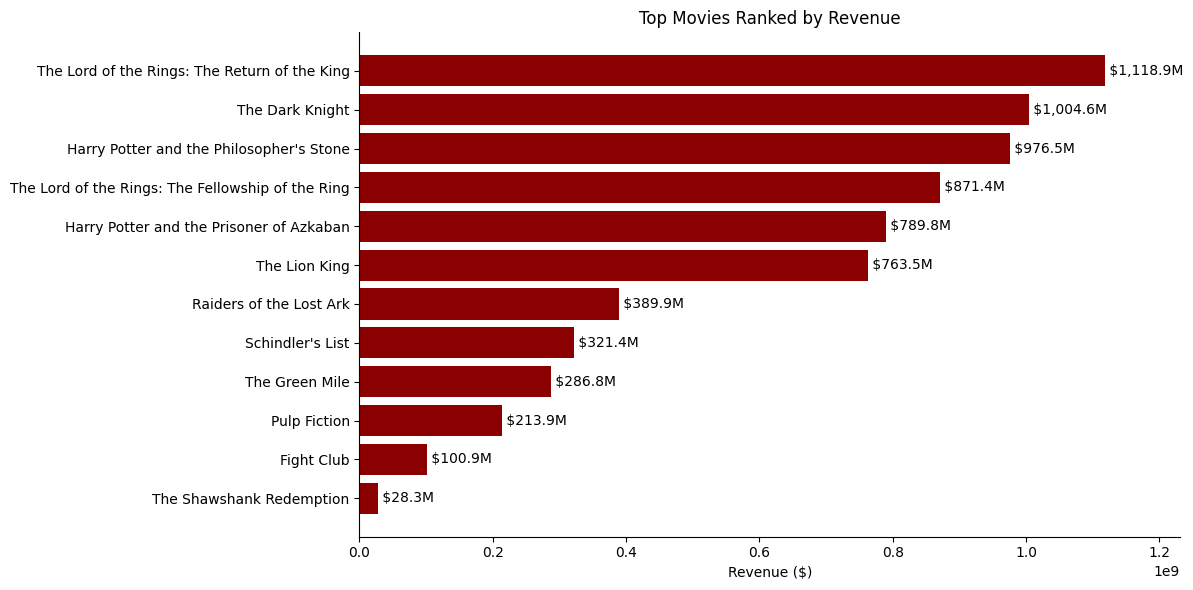

In [7]:
#REVENUE

# Sort movies by Revenue in descending order
tops_sorted_revenue = tops.sort_values('Revenue')

# Create figure and axes with a larger size for better readability
fig, ax = plt.subplots(figsize=(12, 6))

# Make the figure and axes background transparent
fig.patch.set_alpha(0.0)
ax.set_facecolor('none')

# Create horizontal bar chart with darkred color
ax.barh(range(len(tops_sorted_revenue)), tops_sorted_revenue['Revenue'], color='darkred')

# Remove spines with seaborn
sns.despine()

# Customize the chart
ax.set_yticks(range(len(tops_sorted_revenue)))
ax.set_yticklabels(tops_sorted_revenue['Title'])
ax.set_xlabel('Revenue ($)')
ax.set_title('Top Movies Ranked by Revenue')

# Set x-axis limit with a small margin to prevent text cutoff
ax.set_xlim(0, tops_sorted_revenue['Revenue'].max() * 1.1)  # Add 10% extra space

# Add value labels on each bar - format large numbers in millions
for i, v in enumerate(tops_sorted_revenue['Revenue']):
    ax.text(v, i, f' ${v / 1e6:,.1f}M', va='center')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# If you want to save the chart as a PNG with transparent background:
plt.savefig('top_movies_by_revenue.png', transparent=True, bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

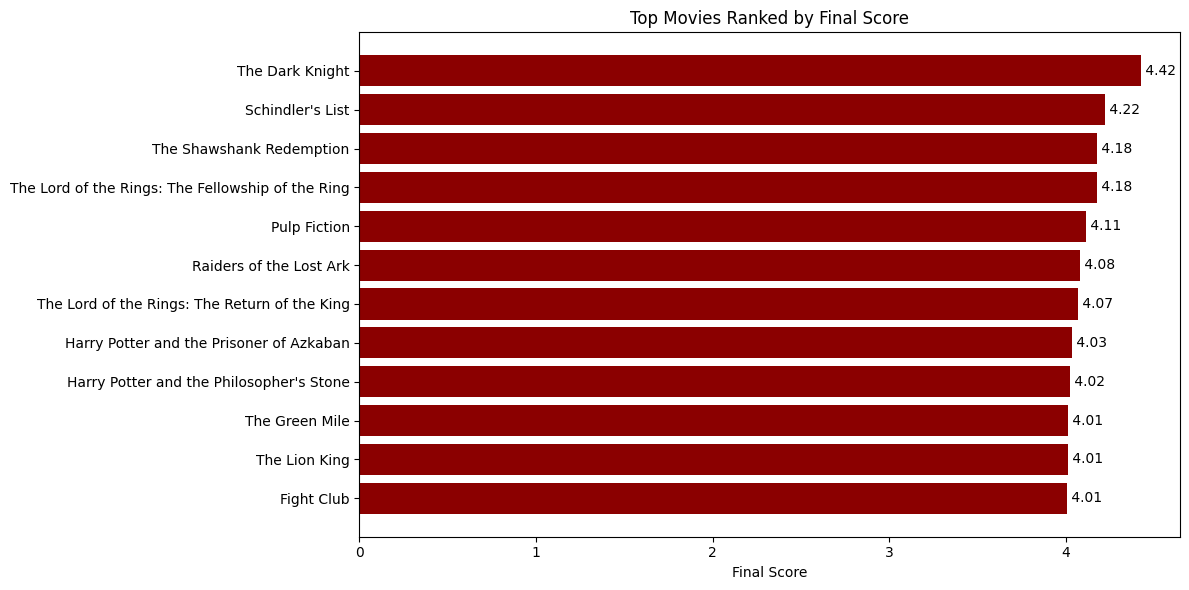

In [8]:
# Sort movies by Final Score in descending order
tops_sorted = tops.sort_values('Final Score')

# Create figure with a larger size for better readability
plt.figure(figsize=(12, 6))

# Create horizontal bar chart
plt.barh(range(len(tops_sorted)), tops_sorted['Final Score'],color='darkred')

# Customize the chart
plt.yticks(range(len(tops_sorted)), tops_sorted['Title'])
plt.xlabel('Final Score')
plt.title('Top Movies Ranked by Final Score')

# Add value labels on each bar
for i, v in enumerate(tops_sorted['Final Score']):
    plt.text(v, i, f' {v:.2f}', va='center')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()


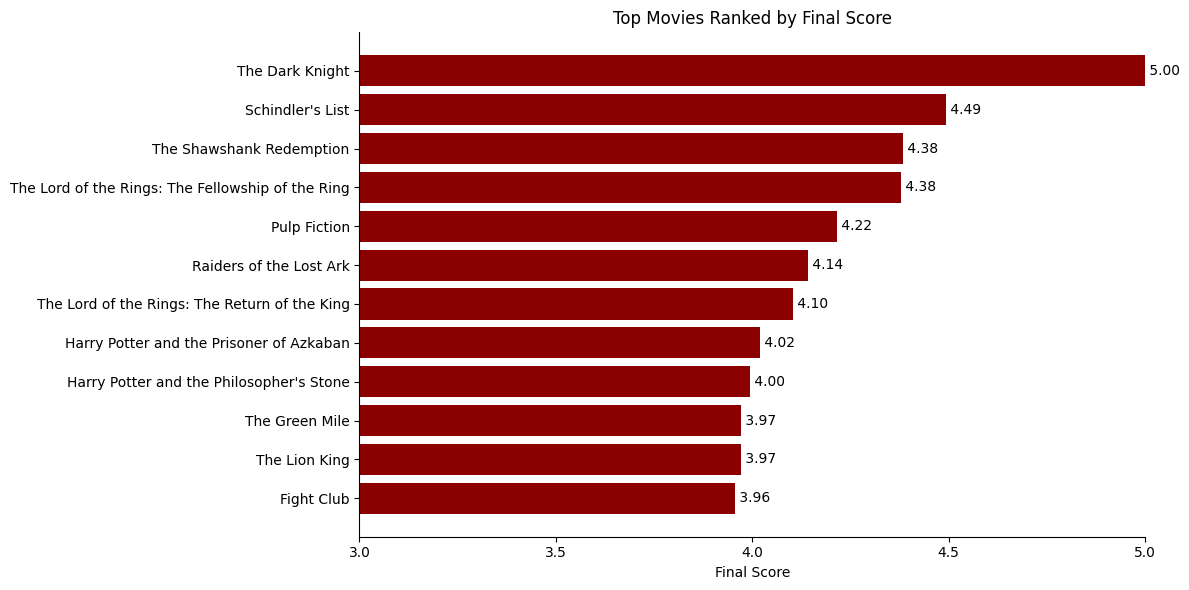

In [13]:
# First calculate the unscaled final scores as before
df_final["Unscaled Final Score"] = (df_final["Compound Score"] * 0.9) + (df_final["Scaled Revenue"] * 0.1)

# Initialize a new scaler for the final scores (0-5 range)
final_scaler = MinMaxScaler(feature_range=(0, 5))

# Scale the final scores
df_final["Final Score"] = final_scaler.fit_transform(df_final[["Unscaled Final Score"]])

# Get the Top 12 Movies based on Final Score
tops = df_final.nlargest(12, "Final Score")[["Title", "Final Score", "Compound Score", "Revenue", "Scaled Revenue", "Genres", "Release Date"]]

# Sort movies by Final Score in descending order
tops_sorted = tops.sort_values('Final Score')

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Make the figure and axes background transparent
fig.patch.set_alpha(0.0)
ax.set_facecolor('none')

# Create horizontal bar chart in dark red
ax.barh(range(len(tops_sorted)), tops_sorted['Final Score'], color='darkred')

# Set the x-axis limits
ax.set_xlim(3, 5)

# Set the x-axis tick marks at 3.0, 3.5, 4.0, 4.5, 5.0
ax.set_xticks([3, 3.5, 4, 4.5, 5])

# Remove spines with seaborn
sns.despine()

# Customize the chart
ax.set_yticks(range(len(tops_sorted)))
ax.set_yticklabels(tops_sorted['Title'])
ax.set_xlabel('Final Score')
ax.set_title('Top Movies Ranked by Final Score')

# Add value labels on each bar
for i, v in enumerate(tops_sorted['Final Score']):
    ax.text(v, i, f' {v:.2f}', va='center')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# If you want to save the figure with a transparent background:
# (Uncomment the line below if desired)
plt.savefig('top_movies_final_score.png', transparent=True, bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


In [15]:
# Convert 'Genres' column from string to a list (only if necessary)
tops["Genres"] = tops["Genres"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Explode the genres so each genre gets its own row
df_exploded = tops.explode("Genres")

In [16]:
# Reset index after exploding to avoid mismatches
df_exploded = tops.explode("Genres").reset_index(drop=True)

# One-hot encode the genres
one_hot_genres = pd.get_dummies(df_exploded["Genres"])

# Concatenate with the exploded DataFrame
df_encoded = pd.concat([df_exploded[["Title"]], one_hot_genres], axis=1)

# Drop duplicate rows (since exploding created multiple rows per movie)
df_encoded = df_encoded.groupby("Title", as_index=False).sum()

# Display the fixed DataFrame
print(df_encoded)

                                                Title  Action  Adventure  \
0                                          Fight Club       0          0   
1            Harry Potter and the Philosopher's Stone       0          1   
2            Harry Potter and the Prisoner of Azkaban       0          1   
3                                        Pulp Fiction       0          0   
4                             Raiders of the Lost Ark       1          1   
5                                    Schindler's List       0          0   
6                                     The Dark Knight       1          0   
7                                      The Green Mile       0          0   
8                                       The Lion King       0          0   
9   The Lord of the Rings: The Fellowship of the Ring       1          1   
10      The Lord of the Rings: The Return of the King       1          1   
11                           The Shawshank Redemption       0          0   

    Animati

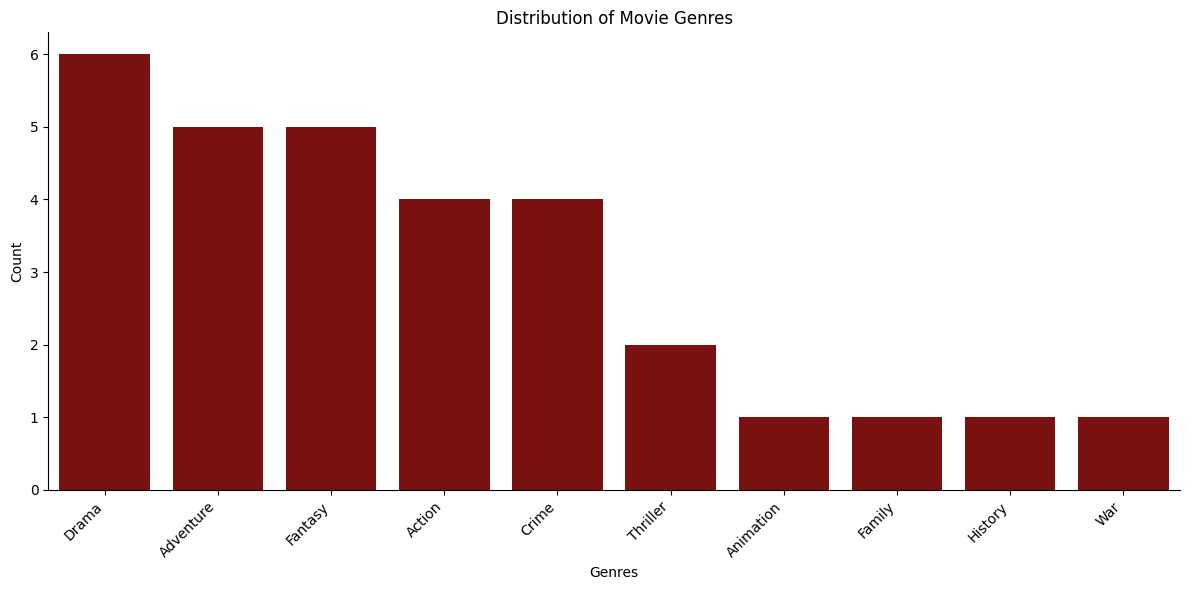

In [17]:
# Sum the occurrences of each genre
genre_counts = df_encoded.drop(columns=["Title"]).sum().sort_values(ascending=False)

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, color = "darkred")

# Remove the frame (top and right spines)
sns.despine()

# Labels and title
plt.xticks(rotation=45, ha="right")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.title("Distribution of Movie Genres")

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save as PNG with transparent background
plt.savefig('genres.png', transparent=True, bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

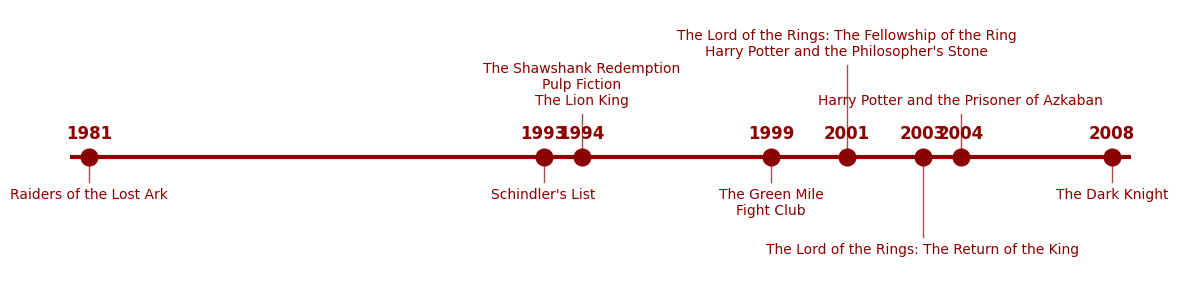

In [18]:
# Suppose 'tops' has columns: ['Title', 'Release Date', ...]
# Convert 'Release Date' to just the year
tops['Release Year'] = pd.to_datetime(tops['Release Date']).dt.year
# Group by release year and gather movie titles into a list
grouped = tops.groupby('Release Year')['Title'].apply(list).reset_index(name='Movies')
# Create a figure with transparent background
fig, ax = plt.subplots(figsize=(12, 3))
fig.patch.set_alpha(0.0) # Transparent figure background
ax.set_facecolor('none') # Transparent axes background
# Determine the min and max years for our timeline
min_year = grouped['Release Year'].min()
max_year = grouped['Release Year'].max()
# Draw a horizontal line (the "timeline")
ax.hlines(y=0, xmin=min_year - 0.5, xmax=max_year + 0.5,
 color='darkred', linewidth=3)
# Define custom positions for each year
text_positions = {
    1981: {'position': 'below', 'offset': -0.25},
    1993: {'position': 'below', 'offset': -0.25},
    1994: {'position': 'above', 'offset': 0.4},
    1999: {'position': 'below', 'offset': -0.25},
    2001: {'position': 'above', 'offset': 0.8},
    2003: {'position': 'below', 'offset': -0.7},
    2004: {'position': 'above', 'offset': 0.4},
    2008: {'position': 'below', 'offset': -0.25}
}
# Plot each year as a marker on the timeline
for _, row in grouped.iterrows():
    year = row['Release Year']
    # Draw a dark red circle for each release year
    ax.plot(year, 0, 'o', color='darkred', markersize=12)
    # Place the year label above the timeline
    ax.text(year, 0.12, str(year),
        ha='center', va='bottom',
        color='darkred', fontsize=12, fontweight='bold')
    
    # Join all movie titles for this year into one string (one per line)
    movies_str = "\n".join(row['Movies'])
    
    # Get custom position for this year
    if year in text_positions:
        config = text_positions[year]
        y_pos = config['offset']
        va_align = 'top' if config['position'] == 'below' else 'bottom'
    else:
        # Default position if not specified
        y_pos = -0.25
        va_align = 'top'
    
    # Place the movie titles based on position
    ax.text(year, y_pos, movies_str,
        ha='center', va=va_align,
        color='darkred', fontsize=10)
    
    # Draw connecting line between dot and text
    # Calculate start and end points for the line
    start_y = 0  # The y-coordinate of the dot (timeline)
    end_y = y_pos  # The y-coordinate where the text is placed
    
    # Set line style based on position (above or below)
    if config['position'] == 'below':
        # Draw line from dot to just above the text (for below timeline text)
        line_end_y = end_y + 0.05  # Stop a bit before the text
    else:
        # Draw line from dot to just below the text (for above timeline text)
        line_end_y = end_y - 0.05  # Stop a bit before the text
    
    # Draw the connecting line
    ax.plot([year, year], [start_y, line_end_y], '-', color='darkred', linewidth=1, alpha=0.7)

# Adjust y-limits to accommodate all text
ax.set_xlim(min_year - 1, max_year + 1)
ax.set_ylim(-1, 1.2) # Adjusted to show all text
# Hide all axes/spines
ax.set_axis_off()
# Tight layout
plt.tight_layout()
# Save figure with a transparent background
plt.savefig("timeline.png", transparent=True, dpi=300)
plt.show()